In [1]:
import cv2
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
def load_image(datapoint):
    image = datapoint['image_left']
    mask = datapoint['segmentation_label']
    return image, mask

def create_pascal_label_colormap():
    colormap = np.zeros((256, 3), dtype=int)
    ind = np.arange(256, dtype=int)

    for shift in reversed(range(8)):
        for channel in range(3):
            colormap[:, channel] |= ((ind >> channel) & 1) << shift
        ind >>= 3

    return colormap   

def label_to_color_image(label):
    if label.ndim != 2:
        raise ValueError('Expect 2-D input label')

    colormap = create_pascal_label_colormap()

    if np.max(label) >= len(colormap):
        raise ValueError('label value too large.')

    return colormap[label]

LABEL_NAMES = np.asarray([
    'unlabeled', 
    'ego vechicle', 
    'rectification border', 
    'out of roi',
    'static',
    'dynamic',
    'ground',
    'road',
    'sidewalk',
    'parking',
    'rail track',
    'building',
    'wall',
    'fence',
    'guard rail',
    'bridge',
    'tunnel',
    'pole',
    'polegroup',
    'traffic light',
    'traffic sign',
    'vegetation',
    'terrain',
    'sky',
    'person',
    'rider',
    'car',
    'truck',
    'bus',
    'caravan',
    'trailer',
    'train',
    'motorcycle',
    'bicycle',
])
FULL_LABEL_MAP = np.arange(len(LABEL_NAMES)).reshape(len(LABEL_NAMES), 1)
FULL_COLOR_MAP = label_to_color_image(FULL_LABEL_MAP)

def display (image, mask):
    unique_labels = np.unique(sample_mask)
    color_sample_mask = label_to_color_image(sample_mask[:,:,0]).astype(np.uint8)

    plt.figure(figsize=(15, 15))
    grid_spec = gridspec.GridSpec(1, 2, width_ratios=[6, 1])
    plt.subplot(grid_spec[0])
    plt.imshow(sample_image)
    plt.imshow(color_sample_mask, alpha=0.4)
    plt.axis('off')

    ax = plt.subplot(grid_spec[1])
    plt.imshow(FULL_COLOR_MAP[unique_labels].astype(np.uint8), interpolation='nearest')
    ax.yaxis.tick_right()
    plt.yticks(range(len(unique_labels)), LABEL_NAMES[unique_labels])
    plt.xticks([], [])
    ax.tick_params(width=0.0)
    plt.grid('off')
    plt.show()


In [3]:
dataset, info = tfds.load(name="cityscapes/semantic_segmentation", with_info=True)
validation = dataset['validation'].map(load_image)

In [4]:
for image, mask in validation.take(2):
    sample_image, sample_mask = image, mask

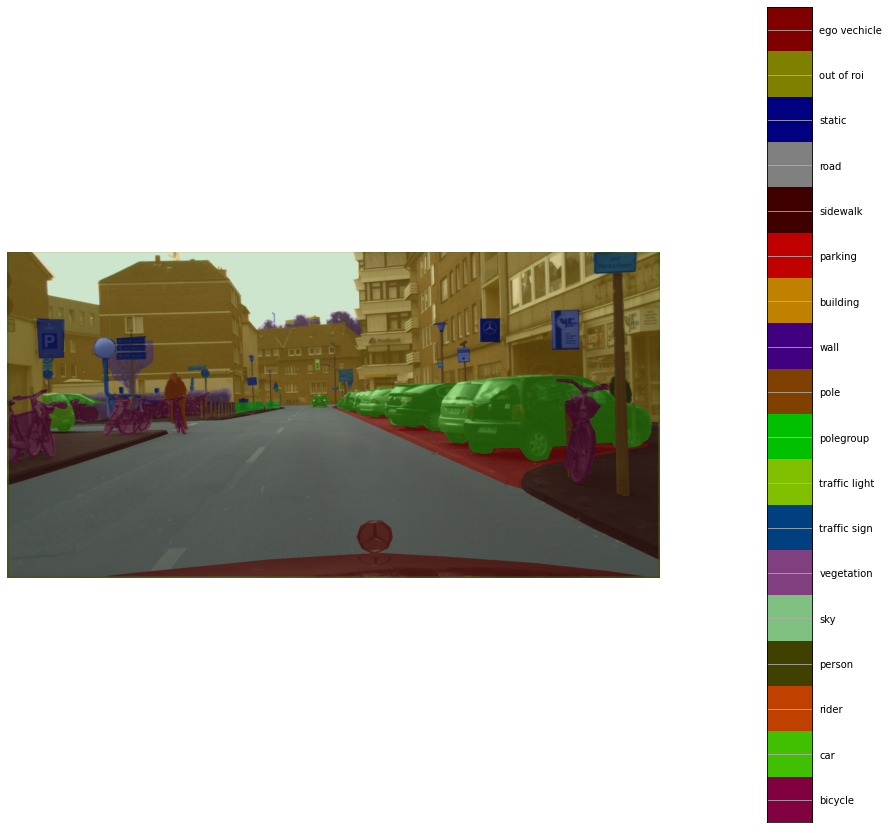

In [5]:
display(sample_image, mask)

In [6]:
i = 1
sample = dataset['validation'].map(load_image)
for image, mask in sample.take(5):
    sample_image, sample_mask = image.numpy(), mask
    cv2.imwrite('image_{}.png'.format(i), sample_image)
    i+=1